In [61]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [62]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [63]:
yes_no = {
    "Yes": True,
    "No": False
}

In [64]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

In [65]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [66]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

In [67]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [68]:
columns = {"Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
           "Unnamed: 4" : "seen_2",
           "Unnamed: 5" : "seen_3",
           "Unnamed: 6" : "seen_4",
           "Unnamed: 7" : "seen_5",
           "Unnamed: 8" : "seen_6"}

In [69]:
star_wars = star_wars.rename(columns = columns)

In [70]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [71]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [72]:
star_wars = star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
                               "Unnamed: 10": "ranking_2",
                               "Unnamed: 11": "ranking_3",
                               "Unnamed: 12": "ranking_4",
                               "Unnamed: 13": "ranking_5",
                               "Unnamed: 14": "ranking_6"})

In [73]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [74]:
mean = star_wars[star_wars.columns[9:15]].mean()
mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [75]:
%matplotlib inline
from matplotlib import pyplot as plt

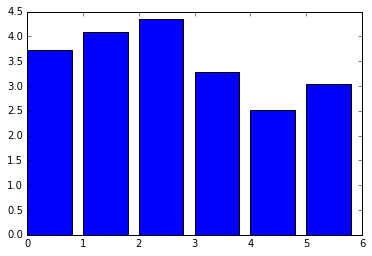

In [76]:
plt.bar(range(6), mean)
plt.show()

L'épisode 3 est le moins aimé des films. L'épisode 5 est le plus aimé.

In [77]:
print(star_wars[star_wars.columns[3:9]].sum())

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


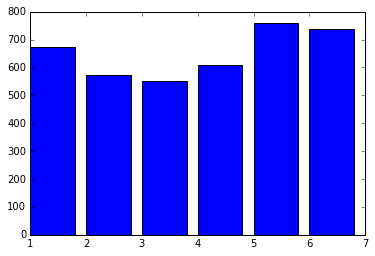

In [90]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())
plt.show()

Le 5 est également le plus vu des films.

In [79]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
fans_startrek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
nonfans_startrek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

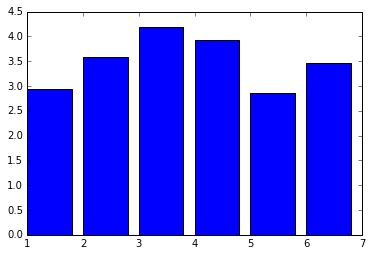

In [93]:
plt.bar(range(1,7), non_fans[non_fans.columns[9:15]].mean())
plt.show()

Le préféré des non-fans est le 5 suivi du 1. Ca change des fans qui n'aiment pas le 1.

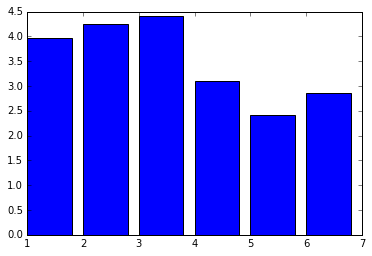

In [94]:
plt.bar(range(1,7), fans_startrek[fans_startrek.columns[9:15]].mean())
plt.show()

Le film préféré des fans de Star Trek est le 5 suivi du 6.

In [84]:
star_wars[star_wars["Age"] == 23.5] = star_wars[star_wars["Age"] == "18-29"]

In [86]:
sw_jeunes = star_wars[star_wars["Age"] == "18-29"]

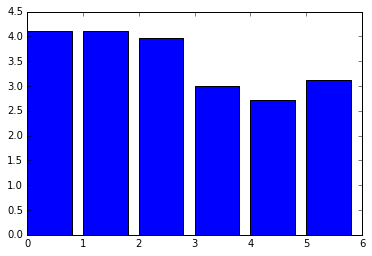

In [88]:
plt.bar(range(6), sw_jeunes[sw_jeunes.columns[9:15]].mean())
plt.show()

Chez les jeunes également, le Star Wars 5 obtient la meilleure note malgré le fait que çe ne soit pas de leur génération.